<a href="https://colab.research.google.com/github/Namesakenberg/machine_learning/blob/main/regularization_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('/content/1.ushape.csv',header=None)
df.columns=['X','Y','class']

In [33]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [34]:
X = df[['X','Y']].values
y  = df ['class'].values

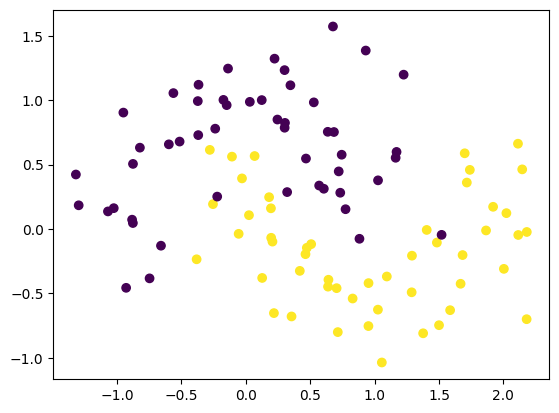

In [35]:
plt.scatter(X[:,0],X[:,1],c=y)

In [36]:
df.shape

(100, 3)

In [42]:
from multiprocessing import Pipe
# make a polynomial log_reg without l2 and plot it
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model_wo_reg = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10 ,include_bias=False )),
    ("scaling",StandardScaler()),
    ("log_reg",LogisticRegression(C=1e10,solver='liblinear',random_state=42))     # c is very large 1^10 , hence lambda is very small and hence the rate of penalizing is very small
])

model_l2 =Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("scaling",StandardScaler()),
    ("log_reg",LogisticRegression(C=0.01 , solver = 'liblinear',random_state=42)) # c is small , so lambda is large hence rate of penalizing is more thus overfitting is reduced
])

model_wo_reg.fit(X_train,y_train)
model_l2.fit(X_train,y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('scaling', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.01, random_state=42,
                                    solver='liblinear'))])

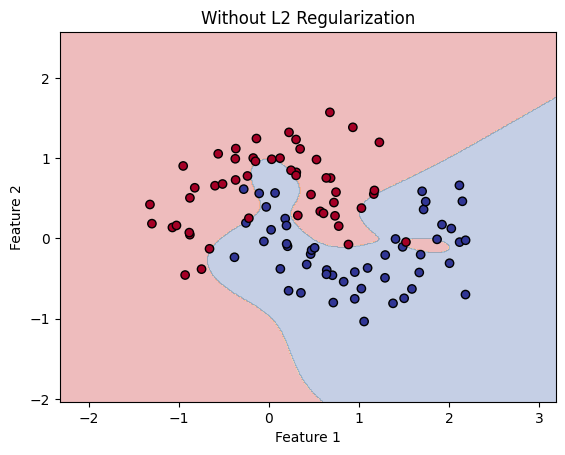

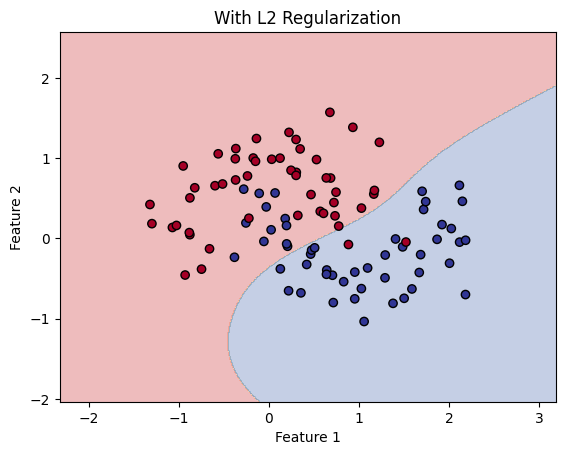

In [44]:
_# plotting the decision boundaries for both the models
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    X_new = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(X_new).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Make sure to use original X and y for plotting
plot_decision_boundary(model_wo_reg, X, y, "Without L2 Regularization")
plot_decision_boundary(model_l2, X, y, "With L2 Regularization")

In [ ]:
# reduced overfitting in model with regularization as C is small , hence lambda is large thus more penalizing happens and thus overfitting is reduced